# Исследование надежности заемщиков


Во второй части проекта вы выполните шаги 3 и 4. Их вручную проверит ревьюер.
Чтобы вам не пришлось писать код заново для шагов 1 и 2, мы добавили авторские решения в ячейки с кодом. 



**Описание проекта**  
<i>Заказчик</i> — кредитный отдел банка. Нужно разобраться, влияет ли семейное положение и количество детей клиента на факт погашения кредита в срок. Входные данные от банка — статистика о платёжеспособности клиентов.
Результаты исследования будут учтены при построении модели кредитного скоринга — специальной системы, которая оценивает    способность потенциального заёмщика вернуть кредит банку.<br>
  
<b>Описание данных:</b><br>
`children` — количество детей в семье  
`days_employed` — общий трудовой стаж в днях  
`dob_years` — возраст клиента в годах  
`education` — уровень образования клиента  
`education_id` — идентификатор уровня образования  
`family_status` — семейное положение  
`family_status_id` — идентификатор семейного положения  
`gender` — пол клиента  
`income_type` — тип занятости  
`debt` — имел ли задолженность по возврату кредитов  
`total_income` — ежемесячный доход  
`purpose` — цель получения кредита

## Откройте таблицу и изучите общую информацию о данных

**Задание 1. Импортируйте библиотеку pandas. Считайте данные из csv-файла в датафрейм и сохраните в переменную `data`. Путь к файлу:**

`/.../data.csv`

In [1]:
#импортируем библиотеку 'pandas' для выполнения расчетов
import pandas as pd

#импортируем 'seaborn' и 'numpy' для визуализации 
import seaborn as sb

import numpy as np

In [42]:
try:
    data = pd.read_csv('D:/DA/Yandex_Praktikum/Projects/1_credit_anaisys/data.csv')
except:
    data = pd.read_csv('https://.../data.csv')

**Задание 2. Выведите первые 20 строчек датафрейма `data` на экран.**

In [43]:
data.head(20)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу
5,0,-926.185831,27,высшее,0,гражданский брак,1,M,компаньон,0,255763.565419,покупка жилья
6,0,-2879.202052,43,высшее,0,женат / замужем,0,F,компаньон,0,240525.971920,операции с жильем
7,0,-152.779569,50,СРЕДНЕЕ,1,женат / замужем,0,M,сотрудник,0,135823.934197,образование
8,2,-6929.865299,35,ВЫСШЕЕ,0,гражданский брак,1,F,сотрудник,0,95856.832424,на проведение свадьбы
9,0,-2188.756445,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425.938277,покупка жилья для семьи


**Задание 3. Выведите основную информацию о датафрейме с помощью метода `info()`.**

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


## Предобработка данных

### Удаление пропусков

**Задание 4. Выведите количество пропущенных значений для каждого столбца. Используйте комбинацию двух методов.**

In [ ]:
data.isna().sum()

children               0
days_employed       2174
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        2174
purpose                0
dtype: int64

In [ ]:
data.isna().mean()*100

children             0.000000
days_employed       10.099884
dob_years            0.000000
education            0.000000
education_id         0.000000
family_status        0.000000
family_status_id     0.000000
gender               0.000000
income_type          0.000000
debt                 0.000000
total_income        10.099884
purpose              0.000000
dtype: float64

**Задание 5. В двух столбцах есть пропущенные значения. Один из них — `days_employed`. Пропуски в этом столбце вы обработаете на следующем этапе. Другой столбец с пропущенными значениями — `total_income` — хранит данные о доходах. На сумму дохода сильнее всего влияет тип занятости, поэтому заполнить пропуски в этом столбце нужно медианным значением по каждому типу из столбца `income_type`. Например, у человека с типом занятости `сотрудник` пропуск в столбце `total_income` должен быть заполнен медианным доходом среди всех записей с тем же типом.**

In [ ]:
for t in data['income_type'].unique():
    data.loc[(data['income_type'] == t) & (data['total_income'].isna()), 'total_income'] = \
    data.loc[(data['income_type'] == t), 'total_income'].median()

### Обработка аномальных значений

**Задание 6. В данных могут встречаться артефакты (аномалии) — значения, которые не отражают действительность и появились по какой-то ошибке. таким артефактом будет отрицательное количество дней трудового стажа в столбце `days_employed`. Для реальных данных это нормально. Обработайте значения в этом столбце: замените все отрицательные значения положительными с помощью метода `abs()`.**

In [ ]:
data['days_employed'] = data['days_employed'].abs()

**Задание 7. Для каждого типа занятости выведите медианное значение трудового стажа `days_employed` в днях.**

In [ ]:
data.groupby('income_type')['days_employed'].agg('median')

income_type
безработный        366413.652744
в декрете            3296.759962
госслужащий          2689.368353
компаньон            1547.382223
пенсионер          365213.306266
предприниматель       520.848083
сотрудник            1574.202821
студент               578.751554
Name: days_employed, dtype: float64

У двух типов (безработные и пенсионеры) получатся аномально большие значения. Исправить такие значения сложно, поэтому оставьте их как есть.

**Задание 8. Выведите перечень уникальных значений столбца `children`.**

In [ ]:
data['children'].unique()

array([ 1,  0,  3,  2, -1,  4, 20,  5], dtype=int64)

**Задание 9. В столбце `children` есть два аномальных значения. Удалите строки, в которых встречаются такие аномальные значения из датафрейма `data`.**

In [ ]:
data = data[(data['children'] != -1) & (data['children'] != 20)]

In [ ]:
data.query(('children!=-1') and ('children!=20'))

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу
...,...,...,...,...,...,...,...,...,...,...,...,...
21520,1,4529.316663,43,среднее,1,гражданский брак,1,F,компаньон,0,224791.862382,операции с жильем
21521,0,343937.404131,67,среднее,1,женат / замужем,0,F,пенсионер,0,155999.806512,сделка с автомобилем
21522,1,2113.346888,38,среднее,1,гражданский брак,1,M,сотрудник,1,89672.561153,недвижимость
21523,3,3112.481705,38,среднее,1,женат / замужем,0,M,сотрудник,1,244093.050500,на покупку своего автомобиля


**Задание 10. Ещё раз выведите перечень уникальных значений столбца `children`, чтобы убедиться, что артефакты удалены.**

In [ ]:
data['children'].unique()

array([1, 0, 3, 2, 4, 5], dtype=int64)

### Удаление пропусков (продолжение)

**Задание 11. Заполните пропуски в столбце `days_employed` медианными значениями по каждого типа занятости `income_type`.**

In [ ]:
for t in data['income_type'].unique():
    data.loc[(data['income_type'] == t) & (data['days_employed'].isna()), 'days_employed'] = \
    data.loc[(data['income_type'] == t), 'days_employed'].median()

**Задание 12. Убедитесь, что все пропуски заполнены. Проверьте себя и ещё раз выведите количество пропущенных значений для каждого столбца с помощью двух методов.**

In [ ]:
data.isna().sum()

children            0
days_employed       0
dob_years           0
education           0
education_id        0
family_status       0
family_status_id    0
gender              0
income_type         0
debt                0
total_income        0
purpose             0
dtype: int64

### Изменение типов данных

**Задание 13. Замените вещественный тип данных в столбце `total_income` на целочисленный с помощью метода `astype()`.**

In [ ]:
data['total_income'] = data['total_income'].astype(int)

### Обработка дубликатов

**Задание 14. Обработайте неявные дубликаты в столбце `education`. В этом столбце есть одни и те же значения, но записанные по-разному: с использованием заглавных и строчных букв. Приведите их к нижнему регистру.**

In [ ]:
data['education'] = data['education'].str.lower()

**Задание 15. Выведите на экран количество строк-дубликатов в данных. Если такие строки присутствуют, удалите их.**

In [ ]:
data.duplicated().sum()

71

In [ ]:
data = data.drop_duplicates()

### Категоризация данных

**Задание 16. На основании диапазонов, указанных ниже, создайте в датафрейме `data` столбец `total_income_category` с категориями:**

- 0–30000 — `'E'`;
- 30001–50000 — `'D'`;
- 50001–200000 — `'C'`;
- 200001–1000000 — `'B'`;
- 1000001 и выше — `'A'`.


**Например, кредитополучателю с доходом 25000 нужно назначить категорию `'E'`, а клиенту, получающему 235000, — `'B'`. Используйте собственную функцию с именем `categorize_income()` и метод `apply()`.**

In [ ]:
def categorize_income(income):
    try:
        if 0 <= income <= 30000:
            return 'E'
        elif 30001 <= income <= 50000:
            return 'D'
        elif 50001 <= income <= 200000:
            return 'C'
        elif 200001 <= income <= 1000000:
            return 'B'
        elif income >= 1000001:
            return 'A'
    except:
        pass

In [ ]:
data['total_income_category'] = data['total_income'].apply(categorize_income)

In [ ]:
data['total_income_category'].value_counts()

C    15921
B     5014
D      349
A       25
E       22
Name: total_income_category, dtype: int64

**Задание 17. Выведите на экран перечень уникальных целей взятия кредита из столбца `purpose`.**

In [ ]:
data['purpose'].unique()

array(['покупка жилья', 'приобретение автомобиля',
       'дополнительное образование', 'сыграть свадьбу',
       'операции с жильем', 'образование', 'на проведение свадьбы',
       'покупка жилья для семьи', 'покупка недвижимости',
       'покупка коммерческой недвижимости', 'покупка жилой недвижимости',
       'строительство собственной недвижимости', 'недвижимость',
       'строительство недвижимости', 'на покупку подержанного автомобиля',
       'на покупку своего автомобиля',
       'операции с коммерческой недвижимостью',
       'строительство жилой недвижимости', 'жилье',
       'операции со своей недвижимостью', 'автомобили',
       'заняться образованием', 'сделка с подержанным автомобилем',
       'получение образования', 'автомобиль', 'свадьба',
       'получение дополнительного образования', 'покупка своего жилья',
       'операции с недвижимостью', 'получение высшего образования',
       'свой автомобиль', 'сделка с автомобилем',
       'профильное образование', 'высшее об

**Задание 18. Создайте функцию, которая на основании данных из столбца `purpose` сформирует новый столбец `purpose_category`, в который войдут следующие категории:**

- `'операции с автомобилем'`,
- `'операции с недвижимостью'`,
- `'проведение свадьбы'`,
- `'получение образования'`.

**Например, если в столбце `purpose` находится подстрока `'на покупку автомобиля'`, то в столбце `purpose_category` должна появиться строка `'операции с автомобилем'`.**

**Используйте собственную функцию с именем `categorize_purpose()` и метод `apply()`. Изучите данные в столбце `purpose` и определите, какие подстроки помогут вам правильно определить категорию.**

In [ ]:
def categorize_purpose(row):
    try:
        if 'автом' in row:
            return 'операции с автомобилем'
        elif 'жил' in row or 'недвиж' in row:
            return 'операции с недвижимостью'
        elif 'свад' in row:
            return 'проведение свадьбы'
        elif 'образов' in row:
            return 'получение образования'
    except:
        return 'нет категории'

In [ ]:
data['purpose_category'] = data['purpose'].apply(categorize_purpose)

<div class="alert alert-block alert-info">
 Проверка работы функции 
  </div>

In [ ]:
data['purpose_category'].value_counts()

операции с недвижимостью    10751
операции с автомобилем       4279
получение образования        3988
проведение свадьбы           2313
Name: purpose_category, dtype: int64

### Шаг 3. Исследуйте данные и ответьте на вопросы

Для определения зависимости между величинами будем использовать сводные таблицы. в общем случае группируем строки по столбцу который будет предметом анализа (значение для аргумента `'index'`). Данные будем брать из данным столбца `'debt'` (означение для аргумента `'values'`). Далее будем применять функцию `'count'` для определения общего количества заемщиков. У нас бинарные данные в столбце `'debt'`. Применив функцию `'sum'` определим количество строк со значением `'1'`, что будет соответствовать общему количеству должников. Далее применим функцию `'mean'` она покажет среднее значение для столбца, что будет соответствовать доле должников от общего количества заемщиков.
Применим данную методику для целевых показателей.

#### 3.1 Есть ли зависимость между количеством детей и возвратом кредита в срок?

In [ ]:
# код до

# применим описаную выше методику присвоив аргументу 'index' значение исследуемого столбца 'children'
#data.pivot_table(index = 'children', values = 'debt', aggfunc = ['count', 'sum', 'mean'])

In [ ]:
#код после

# применим описаную выше методику присвоив аргументу 'index' значение исследуемого столбца 'children'
table_children_affect_debt = data.pivot_table(index = 'children', values = 'debt', aggfunc = ['count', 'sum', 'mean'])

#удалим в названии столбцов первый индекс, а затем сбросим нумерацию индексов в строках
table_children_affect_debt = table_children_affect_debt.droplevel(1, axis=1).reset_index()

#переименуем столбец 'mean' в 'ratio, %'
table_children_affect_debt=table_children_affect_debt.\
    rename(columns={'children':'children', 'count':'credits', 'sum':'debts', 'mean':'ratio, %'})

#переведем значения столбца 'mean' в проценты с 2 знаками после запятой
table_children_affect_debt['ratio, %']=table_children_affect_debt['ratio, %']*100
table_children_affect_debt['ratio, %']=round(table_children_affect_debt['ratio, %'],2)

#выведем результат на экран, отсортировав данные по столбцу 'debts' в обратном порядке для оценки сбалансированности выборки
display(table_children_affect_debt.sort_values(by='debts',ascending=False))

,children,credits,debts,"ratio, %"
0,0,14091,1063,7.54
1,1,4808,444,9.23
2,2,2052,194,9.45
3,3,330,27,8.18
4,4,41,4,9.76
5,5,9,0,0.00


Объявим функцию для отображения значений на столбцах диаграммы
<a name="function"></a>

In [ ]:
#код не мой, но он помогает более наглядно визуализировать данные на графике (добавляет подписи данных над столбцами) 

def show_values(axs, orient="v", space=.1):
    def _single(ax):
        if orient == "v":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + p.get_height() + (p.get_height()*0.01)
                value = '{:.1f}'.format(p.get_height())
                ax.text(_x, _y, value, ha="center") 
        elif orient == "h":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() + float(space)
                _y = p.get_y() + p.get_height() - (p.get_height()*0.5)
                value = '{:.1f}'.format(p.get_width())
                ax.text(_x, _y, value, ha="left")

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _single(ax)
    else:
        _single(axs)

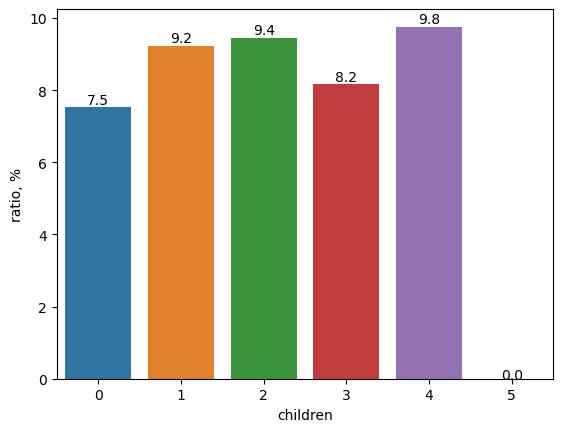

In [ ]:
#выведем результат ан экран в виде столбчатой диаграммы для большей наглядности
barplot_children_affect_debt=sb.barplot(data=table_children_affect_debt, x='children', y='ratio, %')

#используя функцию выводим значения на каждом столбце
show_values(barplot_children_affect_debt)

**Вывод:** Согласно предоставленным данным наиболее добросовестными платильщиками кредита являются бездетные кредитополучатели. С ростом количества делей доля просрочки растет и только заемщики с 5 детьми не имеют просрочек по кредиту, но их количество 9 нельзя использовать т.к. это крайне незначительная величина.

#### 3.2 Есть ли зависимость между семейным положением и возвратом кредита в срок?

In [ ]:
#код до

# применим описаную выше методику присвоив аргументу 'index' значение исследуемого столбца 'family_status'
#data.pivot_table(index = 'family_status', values = 'debt', aggfunc = ['count', 'sum', 'mean'])

In [ ]:
#код после

# применим описаную выше методику присвоив аргументу 'index' значение исследуемого столбца 'family_status'
table_family_status_affect_debt = data.pivot_table(index = 'family_status', values = 'debt', aggfunc = ['count', 'sum', 'mean'])

#удалим в названии столбцов первый индекс, а затем сбросим нумерацию индексов в строках
table_family_status_affect_debt = table_family_status_affect_debt.droplevel(1, axis=1).reset_index()

#переименуем столбец 'mean' в 'ratio, %'
table_family_status_affect_debt=table_family_status_affect_debt.\
    rename(columns={'family_status':'family_status', 'count':'credits', 'sum':'debts', 'mean':'ratio, %'})

#переведем значения столбца 'mean' в проценты с 2 знаками после запятой
table_family_status_affect_debt['ratio, %']=table_family_status_affect_debt['ratio, %']*100
table_family_status_affect_debt['ratio, %']=round(table_family_status_affect_debt['ratio, %'],2)

#выведем результат на экран, отсортировав данные по столбцу 'debts' в обратном порядке для оценки сбалансированности выборки
display(table_family_status_affect_debt.sort_values(by='debts',ascending=False))

,family_status,credits,debts,"ratio, %"
4,женат / замужем,12261,927,7.56
3,гражданский брак,4134,385,9.31
0,Не женат / не замужем,2796,273,9.76
1,в разводе,1189,84,7.06
2,вдовец / вдова,951,63,6.62


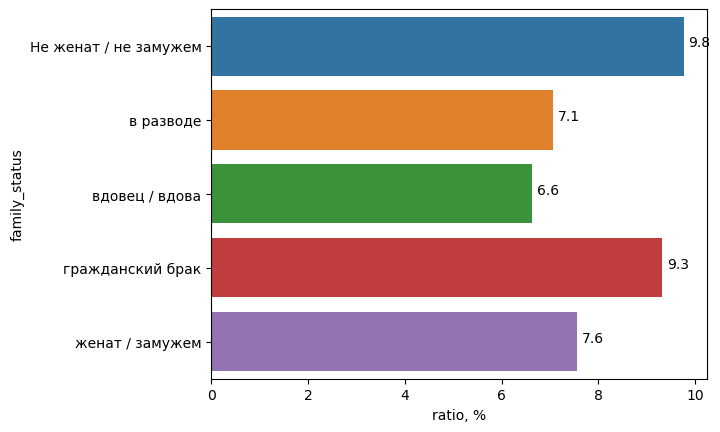

In [ ]:
#выведем результат ан экран в виде столбчатой диаграммы для большей наглядности
barplot_family_status_affect_debt = sb.barplot(data=table_family_status_affect_debt, x='ratio, %', y='family_status')

#используя функцию выводим значения на каждом столбце
show_values(barplot_family_status_affect_debt, "h")

**Вывод:** Представленные в датафрейме данные неравномерны для разных категорий семейного статуса. Достоверные данные имеются только для трех категорий из которых наиболее ответственными являются заемщики находящиеся в браке, доля просрочки здесь составляет 7,56%. Для заемщиков проживающих в гражданском браке либо холостых этот показатель значительно выше и составляет 9,31% и 9,76% соответственно. Данных имеющихся по двум оставшимся категориям (`вдовец/вдова`, в `разводе`) не достаточно для значимых выводов.

#### 3.3 Есть ли зависимость между уровнем дохода и возвратом кредита в срок?

In [ ]:
#код до

# применим описаную выше методику присвоив аргументу 'index' значение исследуемого столбца 'total_income_category'
#data.pivot_table(index = 'total_income_category', values = 'debt', aggfunc = ['count', 'sum', 'mean'])

In [ ]:
#код после

# применим описаную выше методику присвоив аргументу 'index' значение исследуемого столбца 'total_income_category'
table_total_income_category_affect_debt = data.pivot_table(index = 'total_income_category', values = 'debt', aggfunc = ['count', 'sum', 'mean'])

#удалим в названии столбцов первый индекс, а затем сбросим нумерацию индексов в строках
table_total_income_category_affect_debt = table_total_income_category_affect_debt.droplevel(1, axis=1).reset_index()

#переименуем столбец 'mean' в 'ratio, %'
table_total_income_category_affect_debt=table_total_income_category_affect_debt.\
    rename(columns={'family_status':'family_status', 'count':'credits', 'sum':'debts', 'mean':'ratio, %'})

#переведем значения столбца 'mean' в проценты с 2 знаками после запятой
table_total_income_category_affect_debt['ratio, %']=table_total_income_category_affect_debt['ratio, %']*100
table_total_income_category_affect_debt['ratio, %']=round(table_total_income_category_affect_debt['ratio, %'],2)

#выведем результат на экран, отсортировав данные по столбцу 'debts' в обратном порядке для оценки сбалансированности выборки
display(table_total_income_category_affect_debt.sort_values(by='debts',ascending=False))

,total_income_category,credits,debts,"ratio, %"
2,C,15921,1353,8.50
1,B,5014,354,7.06
3,D,349,21,6.02
0,A,25,2,8.00
4,E,22,2,9.09


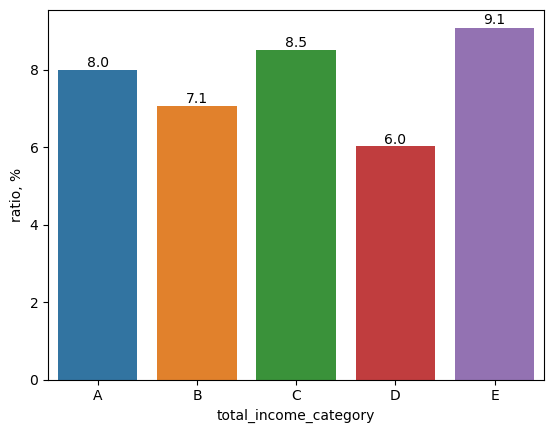

In [ ]:
#выведем результат ан экран в виде столбчатой диаграммы для большей наглядности
bar_plot_total_income_category_affect_debt = sb.barplot(data=table_total_income_category_affect_debt, x='total_income_category', y='ratio, %')

#используя функцию выводим значения на каждом столбце
show_values(bar_plot_total_income_category_affect_debt)

**Вывод:** Исходя из имеющихся данных можно делать значимые выводы только для двух категорий заемщиков (`B` и `C`). Из которых ключевой показатель лучше у категории `B` и составляет всего 7,1% что на 1,4% меньше чем у категории `С`. Оставшиеся группы достоверно оценить не возможно в виду недостаточности выборки.

#### 3.4 Как разные цели кредита влияют на его возврат в срок?

In [ ]:
#код до

# применим описаную выше методику присвоив аргументу 'index' значение исследуемого столбца 'purpose_category'
#data.pivot_table(index = 'purpose_category', values = 'debt', aggfunc = ['count', 'sum', 'mean'])

In [ ]:
#код после

# применим описаную выше методику присвоив аргументу 'index' значение исследуемого столбца 'purpose_category'
table_purpose_category_affect_debt = data.pivot_table(index = 'purpose_category', values = 'debt', aggfunc = ['count', 'sum', 'mean'])

#удалим в названии столбцов первый индекс, а затем сбросим нумерацию индексов в строках
table_purpose_category_affect_debt = table_purpose_category_affect_debt.droplevel(1, axis=1).reset_index()

#переименуем столбец 'mean' в 'ratio, %'
table_purpose_category_affect_debt=table_purpose_category_affect_debt.\
    rename(columns={'family_status':'family_status', 'count':'credits', 'sum':'debts', 'mean':'ratio, %'})

#переведем значения столбца 'mean' в проценты с 2 знаками после запятой
table_purpose_category_affect_debt['ratio, %']=table_purpose_category_affect_debt['ratio, %']*100
table_purpose_category_affect_debt['ratio, %']=round(table_purpose_category_affect_debt['ratio, %'],2)

#выведем результат на экран, отсортировав данные по столбцу 'debts' в обратном порядке для оценки сбалансированности выборки
display(table_purpose_category_affect_debt.sort_values(by='debts',ascending=False))

,purpose_category,credits,debts,"ratio, %"
1,операции с недвижимостью,10751,780,7.26
0,операции с автомобилем,4279,400,9.35
2,получение образования,3988,369,9.25
3,проведение свадьбы,2313,183,7.91


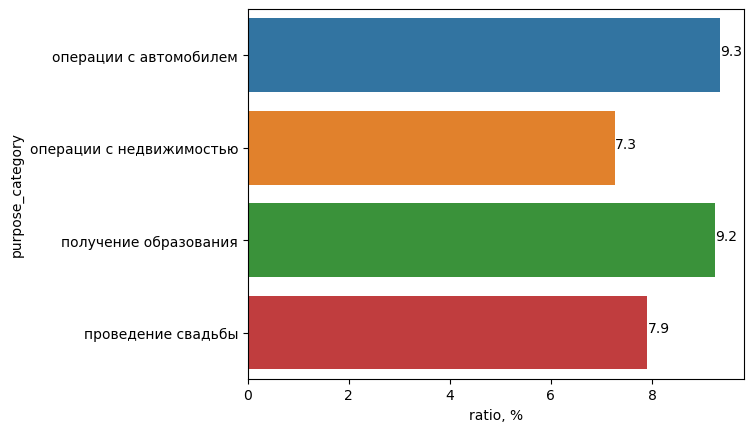

In [ ]:
#выведем результат ан экран в виде столбчатой диаграммы для большей наглядности
graf_purpose_category_affect_debt = sb.barplot(data=table_purpose_category_affect_debt, x ='ratio, %', y='purpose_category')

#используя функцию выводим значения на каждом столбце
show_values(graf_purpose_category_affect_debt, "h", space=0)

**Вывод:** Наиболее рискованными являются кредиты выданные для операций с автомобилем и получение образования. Доля просрочек 9,3% и 9,2% соответственно. Наименьшее количество просрочек было по кредитам взятым на "операции с недвижимостью" всего 7,3%. Доля просрочек для кредитов выданнх на проведение свадьбы составила 7,9%.

#### 3.5 Приведите возможные причины появления пропусков в исходных данных.

*Ответ:* Пропуски в исходных данных возможны по нескольким причинам. Первая техническая, например при выгрузке базы данных. Вторая человеческий фактор. При формировании данных людьми возможны опечатки либо пропуски по невнимательности, или ошибка в типе данных.

#### 3.6 Объясните, почему заполнить пропуски медианным значением — лучшее решение для количественных переменных.

*Ответ:* Медианные значения для количественных переменных позволяют уменьшить влияние экстремальных значений встречающихся в данных.

### Шаг 4: общий вывод.

Перед нами стояла задача по **обнаружению возможной взаимосвязи** между надежностью заемщиков (выраженной в наличии/отсутствии просрочки при выплате кредита) и таких их характеристик как:  
- уровень дохода,  
- семейный статус,  
- количество детей,  
- тип занятости.
  
Целью является оптимизация скоринговой системы банка используемой для оценки заемщика при получении кредита.
  
В исходном датафрейме были представлены данные по 21 252 заемщикам.В процессе предобработки данных определено, что пропуски по составили 10%. Пропущенные данные количественного типа поэтому замена была проведена на медианные значения для соответствующего типа занятости, как параметра, оказывающего наибольшее влияние на получаемый доход. Также был оптимизирован ряд данный путем приведения к наиболее оптимальному типу для количественного значения - 'int' и заменой на модуль для данных в столбце 'days_employed'. Также выявлены аномальные значения в столбце 'children' которые были удалены. Количество строк дубликатов составило 71 что менее чем 0,03% что не оказало влияния на итоговый результат. Кроме того, исходя из целей была проведена работа по категоризации данных об уровне дохода (6 диапазонов) и целей взятия кредита (4 диапазоно), что позволит более точно определить желаемые параметры надежности заемщиков.При этом в ходе анализа выявлена *не достаточная сбалансированность выборки*, что для многих категорий не позволило сделать достоверных выводов.

**В результате исследования установлено следующее:**  
  
Существует **зависимость** между **наличием детей** и возвратом кредита в срок: ***бездетные*** заемщики являются *более дисциплинированными,* доля просрочки у них самая низкая всего ***7,54%,*** при этом *количество детей не оказывает сильного влияния* на наличие просрочки которая составляет от *9,23%* для семей с одним ребенком до *9,45%* для семей с двумя детьми. К сожалению, в данной выборке не достаточно данных для оценки ключевого параметра у семей с большим количеством делей, данных по ним слишком мало. При этом для некоторых категорий (семьи имеющие  5 детей) вообще отсутствую просрочки по оплате кредита, а для семей с 3 детьми этот показатель 8,18%. Рекомендуем сделать более абширную выборку по этим категориям, как потенциально интересным для более точного определения надежности.  
  
При изучении **корреляции** между **семейным положением** и количеством просрочек выявлено, что *наиболее предпочтительными* заемщиками являются ***женатые/замужние***, для которых дола просрочки составляет ***7,6%*** что на 1,75% пункта меньше чем у заемщиков проживающих в *гражданском браке* для которых этот показатель составил 9,31%, у *холостых* же он еще выше и составляет уже 9,8%. При этом для остальных категорий сделать какие-либо значимые выводы не представляется возможным по причине малого количества данных. Хотя для имеющихся данных показатели даже лучше чем у лидеров категории (семейных) и составляет только 6,6%.
  
При рассмотрении выборки на предмет влияния ***уровня дохода*** на наличие просрочек выявлено, что ключевой показатель имеет наименьшее значение у клиентов относящиеся к ***категории "В" с уровнем дохода от 200 001 до 1 000 000 руб.*** с показателем просрочки ***7,06%*** за ними, с отрывом в 1,44% пункта, следуют клиенты категории "С" с уровнем дохода от 50 001 – 200 000 для которых дола просрочку уже составила 8,5%. По остальным категориям нет необходимого количества данных.  
  
Еще одним фактором, для которого была проедена работа по выявлению его влияния на дисциплину возврата кредита, является ***цель получения*** кредитных средств. Нами была проведена работа по категоризации целей по четырем группам для более информативного результата. Оказалось что наиболее ответственно к выплате кредита подходят клиенты, берущие его для **операций с недвижимостью,** доля просрочки составила **7,26%**, далее следуют клиенты, взявшие кредит для проведения свадьбы с показателем 7,91%, при этом аутсайдерами, с небольшим отрывом, являются операции с автомобилем и получение образования 9,25% и 9,35% соответственно.
  
Таким образом при настройке скоринговой системы следует **отдавать предпочтение заёмщикам не имеющими детей, находящимся в браке, имеющими доход от 200 000 до 1 000 000 руб. и планирующих использовать кредитные средства для операций с недвижимостью.**  
  
Для улучшения качества собираемых данных в случае сбора через электронную форму следует применить маски при вводе значений, что позволит избежать части аномальный данных. Таких как отрицательное значение в поле "количество детей" или "время трудового стажа". Если данные находятся в узком диапазоне, целесообразно применение выпадающих списков. Кроме того следует валидировать данные на достоверность. К примеру соотносить возраст заемщики и указываемый стаж. Кроме того следует уделить внимание получению более сбалансированных данных по категориям для получения достоверных выводов. В части категорий показатели обнадеживающие, но не хватает данных для достоверный выводов.


